We start by importing all that we need

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, norm
from statsmodels.stats.proportion import proportions_ztest

# Load the dataset
df = pd.read_csv('AirlinePassengerSatisfaction.csv')

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


1. Is there a statistically significant difference in the level of satisfaction between males and females?

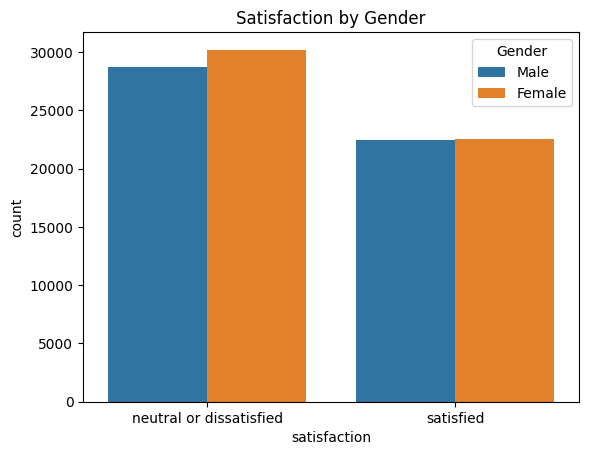

['neutral or dissatisfied' 'satisfied']
T-test result: t = nan, p-value = nan
There is no statistically significant difference in satisfaction between males and females.


In [25]:
# Create a bar plot for satisfaction based on gender
sns.countplot(x='satisfaction', hue='Gender', data=df)
plt.title('Satisfaction by Gender')
plt.show()

# Check unique values in the 'satisfaction' column
print(df['satisfaction'].unique())

# Convert 'satisfaction' column to numeric
df['satisfaction'] = df['satisfaction'].map({'Satisfied': 1, 'Dissatisfied': 0})

# Perform t-test
male_satisfaction = df[df['Gender'] == 'Male']['satisfaction']
female_satisfaction = df[df['Gender'] == 'Female']['satisfaction']
t_stat, p_value = ttest_ind(male_satisfaction, female_satisfaction)

# Display the results
print(f'T-test result: t = {t_stat}, p-value = {p_value}')

# Interpret the results
if p_value < 0.05:
    print('There is a statistically significant difference in satisfaction between males and females.')
else:
    print('There is no statistically significant difference in satisfaction between males and females.')


Question 2: Is there a statistically significant difference in the proportion of satisfied passengers between Economy and Business classes?

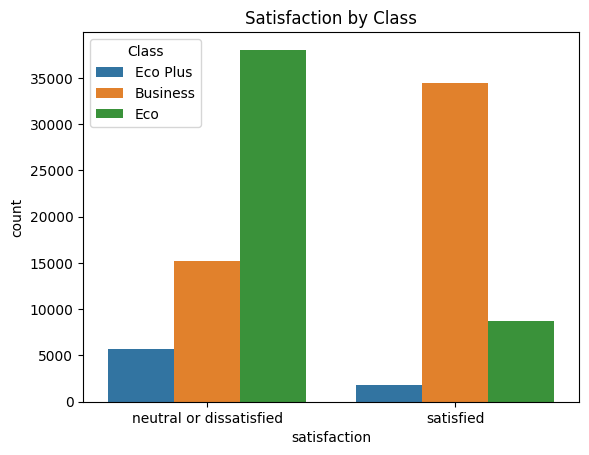

Chi-square test result: chi2 = 26471.862944492277, p-value = 0.0
There is a statistically significant difference in satisfaction between Economy and Business classes.


In [23]:
# Create a bar plot for satisfaction based on class
sns.countplot(x='satisfaction', hue='Class', data=df)
plt.title('Satisfaction by Class')
plt.show()

# Perform chi-square test
contingency_table = pd.crosstab(df['satisfaction'], df['Class'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-square test result: chi2 = {chi2_stat}, p-value = {p_value}')

# Interpret the results
if p_value < 0.05:
    print('There is a statistically significant difference in satisfaction between Economy and Business classes.')
else:
    print('There is no statistically significant difference in satisfaction between Economy and Business classes.')


Question 3: What are the 95% and 99% confidence intervals for the different flight services for females in the population?

In [24]:
# Subset the data for females
female_data = df[df['Gender'] == 'Female']

# Create confidence intervals
confidence_level = 0.95
for service in ['Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment']:
    mean = female_data[service].mean()
    std_dev = female_data[service].std()
    sample_size = len(female_data)
    margin_of_error = norm.ppf((1 + confidence_level) / 2) * (std_dev / (sample_size ** 0.5))
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    
    print(f'95% Confidence Interval for {service}: {confidence_interval}')


95% Confidence Interval for Inflight wifi service: (2.7066386414001475, 2.7292480959450454)
95% Confidence Interval for Online boarding: (3.2951890887383968, 3.3179313239533927)
95% Confidence Interval for Seat comfort: (3.4627497668301235, 3.4849241004485005)
95% Confidence Interval for Inflight entertainment: (3.338727338675383, 3.361521110885563)


Factors Correlated with Passenger Satisfaction

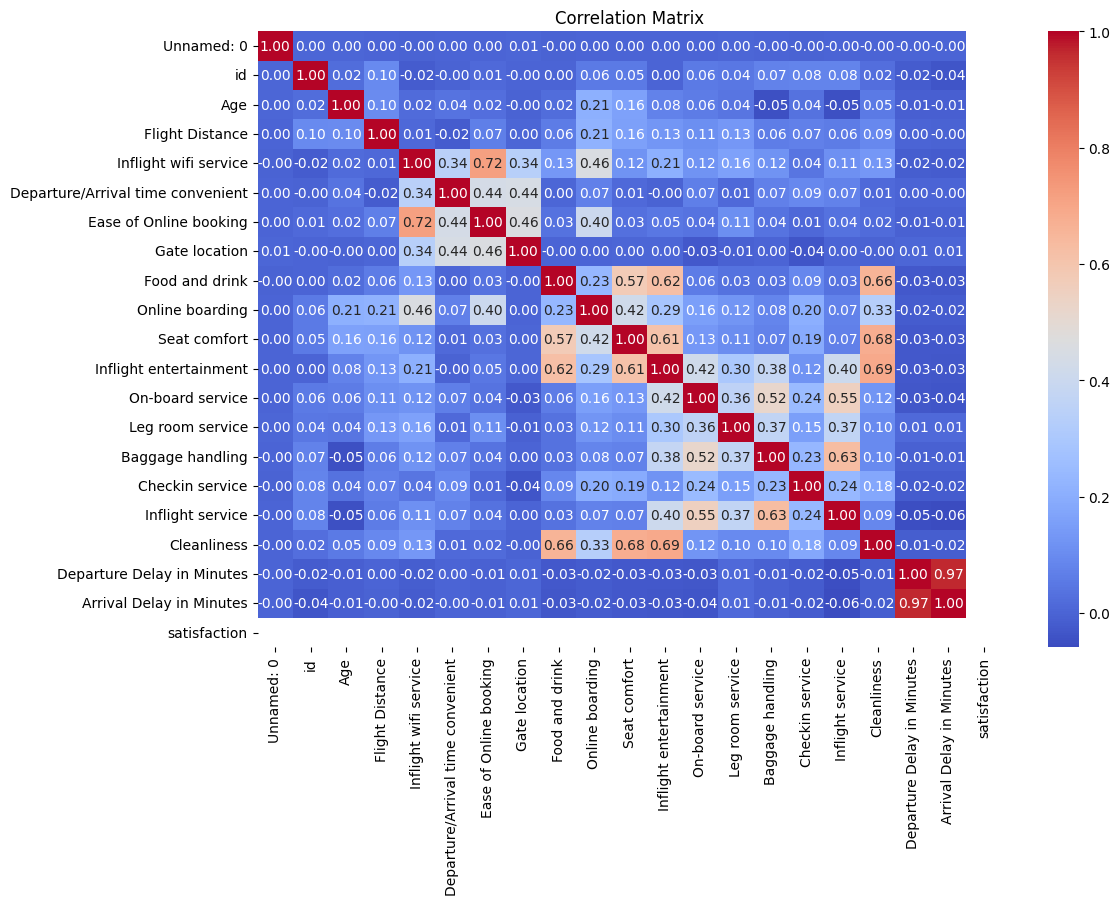

Factors Correlated with Satisfaction:
Unnamed: 0                          NaN
id                                  NaN
Age                                 NaN
Flight Distance                     NaN
Inflight wifi service               NaN
Departure/Arrival time convenient   NaN
Ease of Online booking              NaN
Gate location                       NaN
Food and drink                      NaN
Online boarding                     NaN
Seat comfort                        NaN
Inflight entertainment              NaN
On-board service                    NaN
Leg room service                    NaN
Baggage handling                    NaN
Checkin service                     NaN
Inflight service                    NaN
Cleanliness                         NaN
Departure Delay in Minutes          NaN
Arrival Delay in Minutes            NaN
satisfaction                        NaN
Name: satisfaction, dtype: float64


In [28]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Extract correlations with 'satisfaction'
satisfaction_correlations = correlation_matrix['satisfaction'].sort_values(ascending=False)

# Display factors highly correlated with satisfaction
print("Factors Correlated with Satisfaction:")
print(satisfaction_correlations)
